In [144]:
import pandas as pd
import os

current_dir = os.getcwd()
data_path = os.path.join(current_dir, 'bowler_df.csv')

bowler_df = pd.read_csv(data_path)
bowler_df

,name,country,role,bowl_style,t20_wkts,t20_bowl_econ,t20_bowl_avg,t20_bowl_sr,ipl_wkts,ipl_bowl_econ,ipl_bowl_avg,ipl_bowl_sr
0,khaleel ahmed,india,bowler,left-arm-fast-medium,16,8.52,35.13,24.75,74,8.84,25.42,17.24
1,nathan ellis,australia,bowler,right-arm-fast-medium,32,7.66,16.91,13.25,18,8.61,28.22,19.67
2,jamie overton,england,bowler,right-arm-fast,11,8.21,16.91,12.36,0,0.00,0.00,0.00
3,shreyas gopal,india,bowler,right-arm-legbreak,0,0.00,0.00,0.00,52,8.16,25.92,19.06
4,kamlesh nagarkoti,india,bowler,right-arm-fast,0,0.00,0.00,0.00,5,9.50,57.00,36.00
5,mukesh choudhary,india,bowler,left-arm-fast-medium,0,0.00,0.00,0.00,16,9.70,28.19,17.44
6,mukesh kumar,india,bowler,right-arm-fast-medium,20,9.02,24.35,16.20,24,10.44,28.92,16.63
7,mohit sharma,india,bowler,right-arm-fast-medium,6,8.04,30.83,23.00,132,8.67,24.67,17.07
8,dushmantha chameera,sri lanka,bowler,right-arm-fast,55,8.09,28.87,21.42,9,9.19,48.00,31.33
9,kagiso rabada,south africa,bowler,right-arm-fast,71,8.30,27.15,19.62,117,8.48,21.97,15.54


In [145]:
import numpy as np

df = bowler_df.copy()

# Economy classification
def classify_bowling_style(row):
    if row['ipl_bowl_econ'] <= 7.5 and row['ipl_bowl_econ'] > 0:
        return 'restrictive'
    if row['t20_bowl_econ'] <= 7.5 and row['t20_bowl_econ'] > 0:
        return 'restrictive'
    elif row['ipl_bowl_sr'] <= 16 and row['ipl_bowl_sr'] > 0 and row['ipl_bowl_avg'] <= 18 and row['ipl_bowl_avg'] > 0:
        return 'attacking'
    elif row['t20_bowl_sr'] <= 16 and row['t20_bowl_sr'] > 0 and row['t20_bowl_avg'] <= 18 and row['t20_bowl_avg'] > 0:
        return 'attacking'
    elif row['t20_wkts'] >= 50:
        return 'experienced'
    elif row['ipl_wkts'] >= 50:
        return 'experienced'
    else:
        return 'normal'

df['style'] = df.apply(classify_bowling_style, axis=1)

# One-hot encoding the role
df['is_restrictive'] = (df['style'] == 'restrictive').astype(int)
df['is_attacking'] = (df['style'] == 'attacking').astype(int)
df['is_experienced'] = (df['style'] == 'experienced').astype(int)

df = df.drop(columns=['style'])

In [146]:
df

,name,country,role,bowl_style,t20_wkts,t20_bowl_econ,t20_bowl_avg,t20_bowl_sr,ipl_wkts,ipl_bowl_econ,ipl_bowl_avg,ipl_bowl_sr,is_restrictive,is_attacking,is_experienced
0,khaleel ahmed,india,bowler,left-arm-fast-medium,16,8.52,35.13,24.75,74,8.84,25.42,17.24,0,0,1
1,nathan ellis,australia,bowler,right-arm-fast-medium,32,7.66,16.91,13.25,18,8.61,28.22,19.67,0,1,0
2,jamie overton,england,bowler,right-arm-fast,11,8.21,16.91,12.36,0,0.00,0.00,0.00,0,1,0
3,shreyas gopal,india,bowler,right-arm-legbreak,0,0.00,0.00,0.00,52,8.16,25.92,19.06,0,0,1
4,kamlesh nagarkoti,india,bowler,right-arm-fast,0,0.00,0.00,0.00,5,9.50,57.00,36.00,0,0,0
5,mukesh choudhary,india,bowler,left-arm-fast-medium,0,0.00,0.00,0.00,16,9.70,28.19,17.44,0,0,0
6,mukesh kumar,india,bowler,right-arm-fast-medium,20,9.02,24.35,16.20,24,10.44,28.92,16.63,0,0,0
7,mohit sharma,india,bowler,right-arm-fast-medium,6,8.04,30.83,23.00,132,8.67,24.67,17.07,0,0,1
8,dushmantha chameera,sri lanka,bowler,right-arm-fast,55,8.09,28.87,21.42,9,9.19,48.00,31.33,0,0,1
9,kagiso rabada,south africa,bowler,right-arm-fast,71,8.30,27.15,19.62,117,8.48,21.97,15.54,0,0,1


In [147]:
bowling_roles = {
    "khaleel ahmed": "Opening Bowler",
    "nathan ellis": "Death-over Bowler",
    "jamie overton": "Opening Bowler",
    "shreyas gopal": "Middle-over Bowler",
    "kamlesh nagarkoti": "Opening Bowler",
    "mukesh choudhary": "Opening Bowler",
    "mukesh kumar": "Death-over Bowler",
    "mohit sharma": "Death-over Bowler",
    "dushmantha chameera": "Opening Bowler",
    "kagiso rabada": "Death-over Bowler",
    "prasidh krishna": "Middle-over Bowler",
    "gerald coetzee": "Middle-over Bowler",
    "gurnoor brar": "Opening Bowler",
    "ishant sharma": "Opening Bowler",
    "kulwant khejroliya": "Opening Bowler",
    "manav suthar": "Middle-over Bowler",
    "anrich nortje": "Opening Bowler",
    "spencer johnson": "Opening Bowler",
    "vaibhav arora": "Opening Bowler",
    "umran malik": "Middle-over Bowler",
    "mayank markande": "Middle-over Bowler",
    "avesh khan": "Death-over Bowler",
    "akash deep": "Opening Bowler",
    "shamar joseph": "Opening Bowler",
    "manimaran siddharth": "Middle-over Bowler",
    "akash maharaj singh": "Opening Bowler",
    "deepak chahar": "Opening Bowler",
    "lizaad williams": "Middle-over Bowler",
    "reece topley": "Opening Bowler",
    "karn sharma": "Middle-over Bowler",
    "yuzvendra chahal": "Middle-over Bowler",
    "arshdeep singh": "Death-over Bowler",
    "lockie ferguson": "Death-over Bowler",
    "vijaykumar vyshak": "Middle-over Bowler",
    "yash thakur": "Middle-over Bowler",
    "xavier bartlett": "Opening Bowler",
    "tushar deshpande": "Opening Bowler",
    "maheesh theekshana": "Mystery Spinner",
    "fazalhaq farooqi": "Death-over Bowler",
    "kwena maphaka": "Opening Bowler",
    "akash madhwal": "Death-over Bowler",
    "josh hazlewood": "Opening Bowler",
    "bhuvneshwar kumar": "Opening Bowler",
    "rasikh dar salam": "Middle-over Bowler",
    "suyash sharma": "Middle-over Bowler",
    "nuwan thushara": "Death-over Bowler",
    "lungi ngidi": "Death-over Bowler",
    "mohammed shami": "Opening Bowler",
    "harshal patel": "Death-over Bowler",
    "rahul chahar": "Middle-over Bowler",
    "adam zampa": "Middle-over Bowler",
    "simarjeet singh": "Opening Bowler",
    "brydon carse": "Middle-over Bowler",
    "jaydev unadkat": "Opening Bowler"
}

# Ensure player names are lowercased before mapping
df['skill'] = df['name'].str.lower().map(bowling_roles)

In [148]:
def map_bowl_style_to_role(style):
    style = style.lower()
    if 'medium' in style:
        return 'medium'
    elif 'fast' in style:
        return 'fast'
    elif style == 'right-arm-legbreak':
        return 'wrist spin'
    elif style in ['left-arm-orthodox', 'right-arm-offbreak']:
        return 'finger spin'
    else:
        return 'other'

df['role'] = df['bowl_style'].apply(map_bowl_style_to_role)

In [149]:
df['overseas'] = (df['country'].str.lower() != 'india').astype(int)

In [150]:
df.columns

Index(['name', 'country', 'role', 'bowl_style', 't20_wkts', 't20_bowl_econ',
       't20_bowl_avg', 't20_bowl_sr', 'ipl_wkts', 'ipl_bowl_econ',
       'ipl_bowl_avg', 'ipl_bowl_sr', 'is_restrictive', 'is_attacking',
       'is_experienced', 'skill', 'overseas'],
      dtype='object')

In [151]:
bowler_graph = df[[
    'name', 'role', 'bowl_style', 'is_restrictive', 'is_attacking',
    'is_experienced', 'skill', 'overseas'
]]

In [152]:
bowler_graph = bowler_graph.fillna(0)

In [153]:
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
data_path = os.path.join(parent_dir, 'auction_data.csv')

auction = pd.read_csv(data_path)

In [154]:
auction = auction[['player', 'year', 'price']]
auction = auction[auction['year'] == 2025]

In [155]:
auction['player_lower'] = auction['player'].str.lower()
bowler_graph = bowler_graph.merge(
    auction[['player_lower', 'price']],
    left_on='name',
    right_on='player_lower',
    how='left'
)
bowler_graph = bowler_graph.drop(columns=['player_lower'])
bowler_graph['price'] = bowler_graph['price']/10000000

In [156]:
bowler_graph.to_csv('bowler_graph.csv', index=False)

In [157]:
bowler_graph['skill'].unique()

array(['Opening Bowler', 'Death-over Bowler', 'Middle-over Bowler',
       'Mystery Spinner'], dtype=object)

In [158]:
drop_names = [
    'nathan ellis', 'jamie overton', 'mukesh choudhary', 'kulwant khejroliya',
    'gurnoor brar', 'spencer johnson', 'vaibhav arora', 'shamar joseph',
    'lizaad williams', 'reece topley', 'vijaykumar vyshak', 'yash thakur',
    'xavier bartlett', 'tushar deshpande', 'rasikh dar salam', 'brydon carse',
    'akash madhwal', 'kwena maphaka', 'kamlesh nagarkoti', 'manav suthar', 'karn sharma', 'akash deep'
]
bowler_graph = bowler_graph[~bowler_graph['name'].str.lower().isin([n.strip() for n in drop_names])]
bowler_graph

,name,role,bowl_style,is_restrictive,is_attacking,is_experienced,skill,overseas,price
0,khaleel ahmed,medium,left-arm-fast-medium,0,0,1,Opening Bowler,0,4.80
3,shreyas gopal,wrist spin,right-arm-legbreak,0,0,1,Middle-over Bowler,0,0.30
6,mukesh kumar,medium,right-arm-fast-medium,0,0,0,Death-over Bowler,0,8.00
7,mohit sharma,medium,right-arm-fast-medium,0,0,1,Death-over Bowler,0,2.20
8,dushmantha chameera,fast,right-arm-fast,0,0,1,Opening Bowler,1,0.75
9,kagiso rabada,fast,right-arm-fast,0,0,1,Death-over Bowler,1,10.75
10,prasidh krishna,fast,right-arm-fast,0,0,0,Middle-over Bowler,0,9.50
11,gerald coetzee,fast,right-arm-fast,0,0,0,Middle-over Bowler,1,2.40
13,ishant sharma,medium,right-arm-fast-medium,0,0,1,Opening Bowler,0,0.75
16,anrich nortje,fast,right-arm-fast,1,0,0,Opening Bowler,1,6.50


In [159]:
bowler_graph.to_csv('bowler_graph.csv', index=False)

In [160]:
def compute_synergy(u, v):
    synergy = 0.0

    # Complementary bowling skills (Opening, Death, Middle, Mystery)
    if u['skill'] != v['skill']:
        synergy += 0.6
    else:
        synergy -= 0.3

    # Complementary bowling styles (e.g., left-arm vs right-arm, pace vs spin)
    if u['bowl_style'] != v['bowl_style']:
        synergy += 0.5
    else:
        synergy -= 0.2

    # Fast bowler + spin bowler combo is good
    # Fast bowler + spin bowler combo is good
    fast_roles = ['fast', 'medium']
    spin_roles = ['wrist spin', 'finger spin']
    u_is_fast = u['role'].lower() in fast_roles
    v_is_fast = v['role'].lower() in fast_roles
    u_is_spin = u['role'].lower() in spin_roles
    v_is_spin = v['role'].lower() in spin_roles

    if (u_is_fast and v_is_spin) or (u_is_spin and v_is_fast):
        synergy += 0.7
    else:
        synergy -= 0.1

    # Restrictive + attacking combo is good
    if (u['is_restrictive'] == 1 and v['is_attacking'] == 1) or (u['is_attacking'] == 1 and v['is_restrictive'] == 1):
        synergy += 1
    elif (u['is_restrictive'] == 1 and v['is_restrictive'] == 1) or (u['is_attacking'] == 1 and v['is_attacking'] == 1):
        synergy += 0.2

    # Experienced + inexperienced combo is good for balance
    if (u['is_experienced'] == 1 and v['is_experienced'] == 0) or (u['is_experienced'] == 0 and v['is_experienced'] == 1):
        synergy += 0.4
    elif u['is_experienced'] == 1 and v['is_experienced'] == 1:
        synergy += 0.2
    else:
        synergy -= 0.1

    # Overseas synergy adjustment
    if u['overseas'] == 1 and v['overseas'] == 1:
        synergy -= 0.1
    # elif u['overseas'] == 0 and v['overseas'] == 0:
    #     synergy += 0.2

    return synergy

In [161]:
import networkx as nx
import pandas as pd

df = bowler_graph

G = nx.Graph()

# Add players as nodes
for idx, row in df.iterrows():
    G.add_node(row['name'], **row.to_dict())

# Add synergy edges
for i in range(len(df)):
    for j in range(i + 1, len(df)):
        u = df.iloc[i]
        v = df.iloc[j]
        synergy = compute_synergy(u, v)
        if synergy > 0:  # Only keep meaningful synergy edges
            G.add_edge(u['name'], v['name'], weight=synergy)

C:\Users\Akindu Himan\AppData\Local\Temp\ipykernel_44808\2983942470.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('coolwarm')  # You can change to 'viridis', 'plasma', etc.


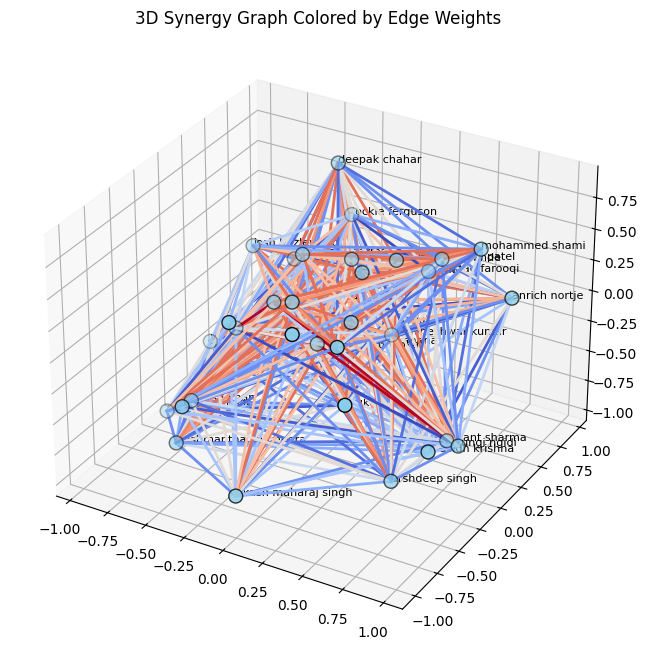

In [162]:
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors

# 3D layout (spring layout in 3D)
def spring_layout_3d(G, dim=3, seed=42):
    import random
    random.seed(seed)
    pos_2d = nx.spring_layout(G, dim=2, seed=seed)
    pos_3d = {}
    for node in G.nodes():
        pos_3d[node] = np.append(pos_2d[node], np.random.uniform(-1, 1))  # Add Z
    return pos_3d

# Generate 3D positions
pos_3d = spring_layout_3d(G)

# Extract edge weights and normalize them
edge_weights = nx.get_edge_attributes(G, 'weight')
weights = list(edge_weights.values())
norm = colors.Normalize(vmin=min(weights), vmax=max(weights))
cmap = cm.get_cmap('coolwarm')  # You can change to 'viridis', 'plasma', etc.
edge_colors = [cmap(norm(w)) for w in weights]

# Map edge to its color
edge_color_map = {edge: color for edge, color in zip(edge_weights, edge_colors)}

# Start plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Draw edges with colors based on weight
for i, (u, v) in enumerate(G.edges()):
    x = [pos_3d[u][0], pos_3d[v][0]]
    y = [pos_3d[u][1], pos_3d[v][1]]
    z = [pos_3d[u][2], pos_3d[v][2]]
    w = G[u][v]['weight']
    ax.plot(x, y, z, c=cmap(norm(w)), linewidth=2)

# Draw nodes
xs, ys, zs = zip(*[pos_3d[node] for node in G.nodes()])
ax.scatter(xs, ys, zs, s=100, c='skyblue', edgecolors='black')

# Add node labels
for node in G.nodes():
    x, y, z = pos_3d[node]
    ax.text(x, y, z, node, size=8, zorder=1)

ax.set_title("3D Synergy Graph Colored by Edge Weights")
plt.show()

In [163]:
from pulp import LpMaximize, LpProblem, LpVariable, lpSum, LpBinary
import networkx as nx

def optimize_team(df, G, limits, budget):
    player_names = df['name'].tolist()
    x = {name: LpVariable(f"x_{name}", cat=LpBinary) for name in player_names}

    prob = LpProblem("Maximize_Synergy", LpMaximize)

    # Create auxiliary variables for edge synergy
    y = {}
    for u, v, data in G.edges(data=True):
        if u in x and v in x:
            var_name = f"y_{u}_{v}"
            y[(u, v)] = LpVariable(var_name, cat=LpBinary)
            # Constraints for AND logic
            prob += y[(u, v)] <= x[u]
            prob += y[(u, v)] <= x[v]
            prob += y[(u, v)] >= x[u] + x[v] - 1

    # Objective: Maximize synergy
    prob += lpSum([y[(u, v)] * data['weight'] for (u, v), data in G.edges.items() if (u, v) in y])

    # Position & overseas constraints
    for cat in ['fast','medium','wrist spin','finger spin']:
        cat_players = df[df['role'] == cat]
        player_names_in_cat = cat_players['name']
        prob += lpSum([x[name] for name in player_names_in_cat]) == limits[cat]

        # Overseas limit per category
        overseas_players = cat_players[cat_players['overseas'] == 1]['name']
        prob += lpSum([x[name] for name in overseas_players]) <= 1

    # Total player count
    prob += lpSum(x[name] for name in player_names) == sum(limits.values())

    # Budget constraint
    prob += lpSum([x[name] * df[df['name'] == name]['price'].values[0] for name in player_names]) <= budget


    prob.solve()
    # Return selected team
    return [name for name in player_names if x[name].varValue == 1]

In [169]:
# Option to specify players to remove before optimization
players_to_remove = ['lungi ngidi']

# Remove specified players from bowler_graph
filtered_bowler_graph = bowler_graph[~bowler_graph['name'].isin(players_to_remove)].copy()

limits = {
    'fast': 1,
    'medium': 2,
    'finger spin':2,
    'wrist spin':1
}
budget = 32

best_team = optimize_team(filtered_bowler_graph, G, limits, budget)
print("Optimized Team:", best_team)

selected_rows = filtered_bowler_graph[filtered_bowler_graph['name'].isin(best_team)].sort_values('role', ascending=True)
total_cost = selected_rows['price'].sum()
print("Total Cost:", total_cost)
selected_rows

Optimized Team: ['avesh khan', 'manimaran siddharth', 'maheesh theekshana', 'nuwan thushara', 'rahul chahar', 'jaydev unadkat']
Total Cost: 20.7


,name,role,bowl_style,is_restrictive,is_attacking,is_experienced,skill,overseas,price
21,avesh khan,fast,right-arm-fast,0,0,1,Death-over Bowler,0,9.75
24,manimaran siddharth,finger spin,left-arm-orthodox,0,0,0,Middle-over Bowler,0,0.75
37,maheesh theekshana,finger spin,right-arm-offbreak,1,0,0,Mystery Spinner,1,4.40
45,nuwan thushara,medium,right-arm-fast-medium,0,1,0,Death-over Bowler,1,1.60
53,jaydev unadkat,medium,left-arm-fast-medium,0,0,1,Opening Bowler,0,1.00
49,rahul chahar,wrist spin,right-arm-legbreak,0,0,1,Middle-over Bowler,0,3.20
